In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


In [3]:
# We have 3 dataset, 

# 1) Here I am going to observe room prices regarding to date
# 2) Effects of client reviews on price.
# 3) Finally we are going to 

In [4]:
df_cal=pd.read_csv("//kaggle/input/seattle/calendar.csv")
df_cal

In [5]:
# We should transform price column to numeric data
df_cal.dtypes


listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
#  drop missing price
df_cal=df_cal.dropna(axis=0, subset=["price"] )

In [7]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [8]:
# Remove commas in price
df_cal['price'] = df_cal['price'].apply(lambda x:''.join(x.split('.')[0]))
df_cal['price'] = df_cal['price'].apply(lambda x:x.replace(',',""))

In [9]:

df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85
1,241032,2016-01-05,t,$85
9,241032,2016-01-13,t,$85
10,241032,2016-01-14,t,$85
14,241032,2016-01-18,t,$85


In [10]:


# Convert price to numeric data
df_cal['price'] = df_cal['price'].apply(lambda x:float(x.split('$')[1]))


In [11]:
df_cal['date'] = pd.to_datetime(df_cal['date'],format="%Y-%m-%d")
df_cal['year'] = df_cal['date'].dt.year
df_cal['month'] = df_cal['date'].dt.month
df_cal['day'] = df_cal['date'].dt.day
df_cal['day_name'] = df_cal['date'].dt.day_name()
df_cal['day_num'] = df_cal['date'].dt.weekday
df_cal.head()


,listing_id,date,available,price,year,month,day,day_name,day_num
0,241032,2016-01-04,t,85.0,2016,1,4,Monday,0
1,241032,2016-01-05,t,85.0,2016,1,5,Tuesday,1
9,241032,2016-01-13,t,85.0,2016,1,13,Wednesday,2
10,241032,2016-01-14,t,85.0,2016,1,14,Thursday,3
14,241032,2016-01-18,t,85.0,2016,1,18,Monday,0


In [12]:
#Covert available to numeric data
df_cal['available'] = df_cal['available'].apply(lambda x:1 if x =='t' else 0)

In [13]:
df_cal.head()

,listing_id,date,available,price,year,month,day,day_name,day_num
0,241032,2016-01-04,1,85.0,2016,1,4,Monday,0
1,241032,2016-01-05,1,85.0,2016,1,5,Tuesday,1
9,241032,2016-01-13,1,85.0,2016,1,13,Wednesday,2
10,241032,2016-01-14,1,85.0,2016,1,14,Thursday,3
14,241032,2016-01-18,1,85.0,2016,1,18,Monday,0


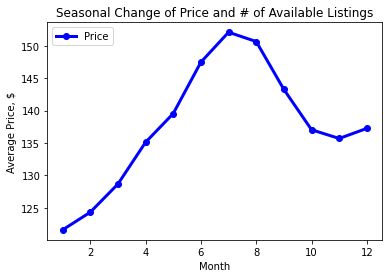

In [14]:
# Plot average price and total number of listings per month to see seasonal patterns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig,ax = plt.subplots()
ax.plot(df_cal[df_cal.year==2016].groupby(['month']).price.mean(),color='blue', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')



ax.legend(loc=2)


plt.title('Seasonal Change of Price and # of Available Listings')
plt.show()

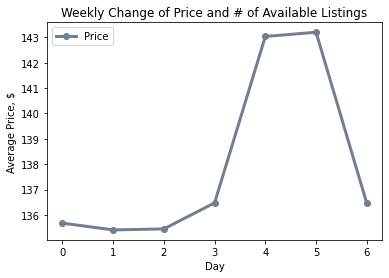

In [15]:
# Plot average price and total listing to weekly patterns
fig,ax = plt.subplots()
ax.plot(df_cal.groupby(['day_num']).price.mean(),color='slategrey', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Day')
ax.set_ylabel('Average Price, $')



ax.legend(loc=2)

plt.title('Weekly Change of Price and # of Available Listings')
plt.show()

In [ ]:
# Graphs show that  June-July-August prices are higher than other months so that we can see at warmer months prices increases.
# Daily graph shows that Friday and Saturday prices are hight than other days,
# so that we can we can think that people generally seek for accomodation for weekend holiday.

In [ ]:
# Here we are going to observe  listing properties-price relation.

In [36]:
df_list=pd.read_csv("//kaggle/input/seattle/listings.csv")
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [42]:
def clear_dollar(price):

# Remove commas in price
    if type(price)==str:
        price=price[1:].replace(",","")
        price=float(price)
    return price

In [43]:
df_list.dropna(axis=0,subset=["price"], inplace=True)
#Convert dollar dtype to float
df_list['price'] = df_list['price'].apply(lambda x:clear_dollar(x))
df_list['monthly_price'] = df_list['monthly_price'].apply(lambda x:clear_dollar(x))
df_list['weekly_price'] = df_list['weekly_price'].apply(lambda x:clear_dollar(x))
df_list['security_deposit'] = df_list['security_deposit'].apply(lambda x:clear_dollar(x))
df_list['cleaning_fee'] = df_list['cleaning_fee'].apply(lambda x:clear_dollar(x))
df_list['extra_people'] = df_list['extra_people'].apply(lambda x:clear_dollar(x))


In [46]:
df_list

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


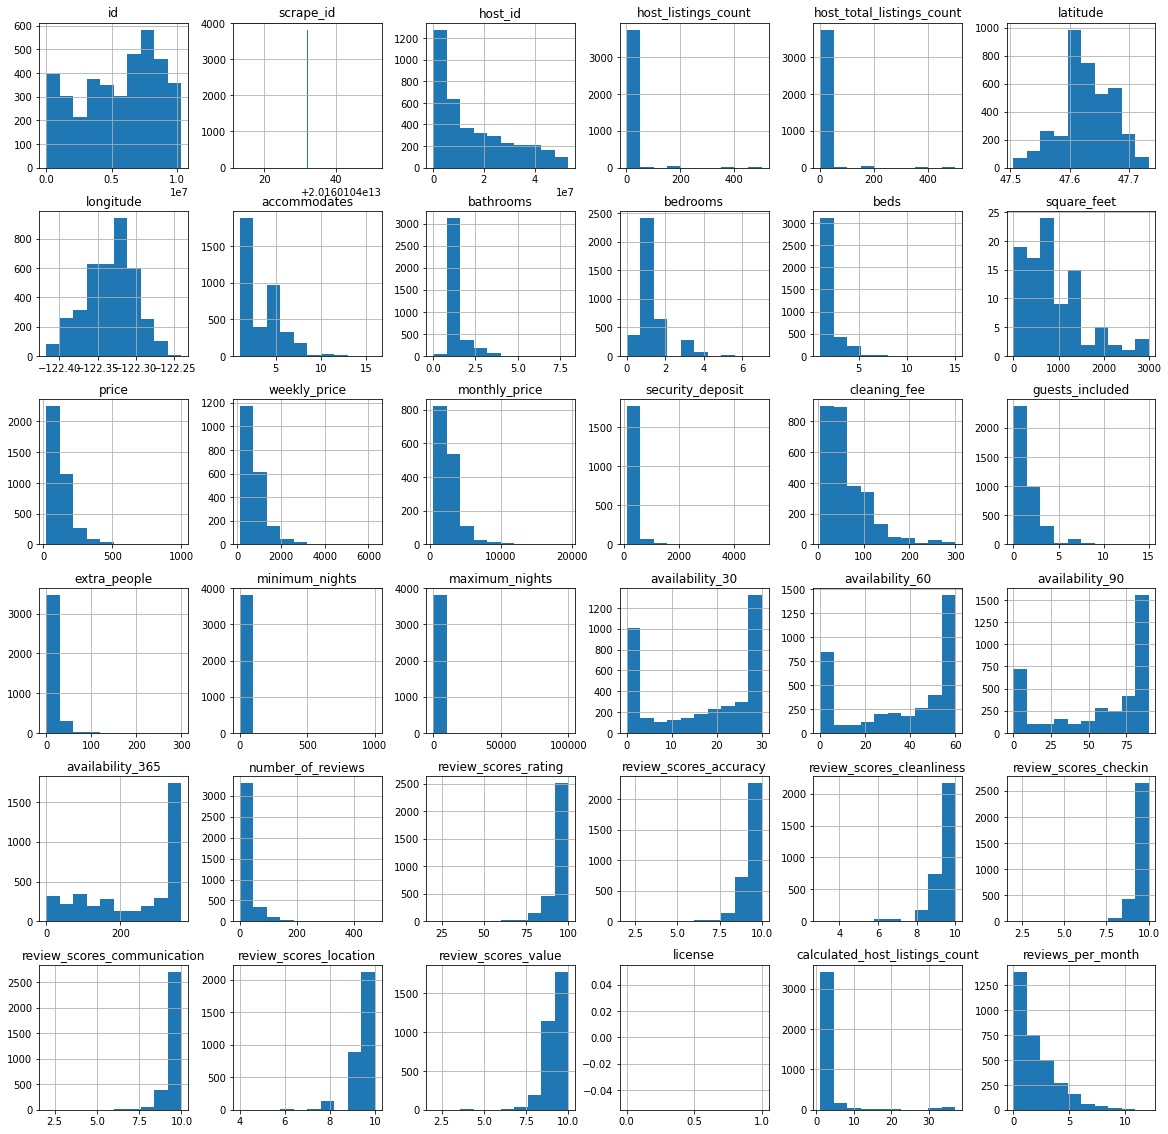

In [47]:
df_list.hist(figsize=(20,20))
plt.show()

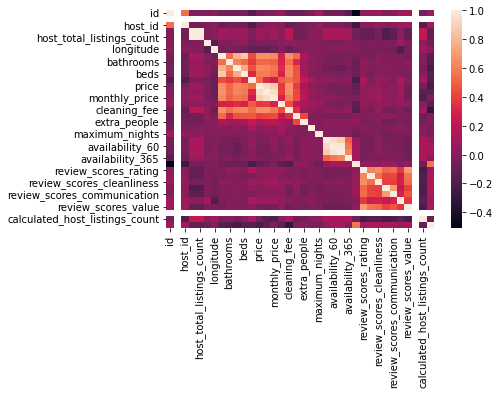

In [48]:
sns.heatmap(df_list.corr())
plt.show()
df_list.corr()['reviews_per_month'].sort_values()

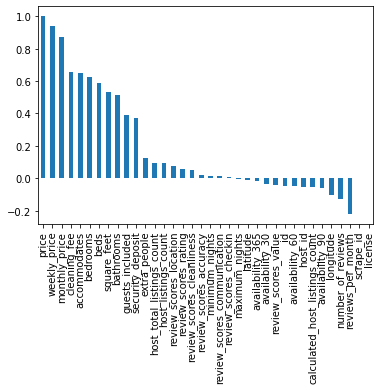

In [55]:
df_list.corr()['price'].sort_values(ascending=False).plot.bar(y=200,x=8000)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns

In [ ]:
 #Split into explanatory and response variables
X = df_cal_price.drop(["price","listing_id"], axis=1)
y = df_cal_price["price"]

    #Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

    #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

test_score


In [ ]:
train_score

In [ ]:
type(y_test_preds)

In [ ]:
result=pd.DataFrame(y_test_preds,y_test)

In [ ]:
result

In [ ]:
df_list=pd.read_csv("/kaggle/input/seattle/listings.csv")
df_list.head()

We are going to investigate  here "df_list.columns" to select meaningful columns for our analysis.

In [ ]:
df_list.columns

In [ ]:
list_num_vars = df_list.select_dtypes(include=['float', 'int']).columns
num_vars

In [ ]:
list_cat_vars=df_list.select_dtypes(include=["object"]).columns
list_cat_vars

In [ ]:
df_rev=pd.read_csv("/kaggle/input/seattle/reviews.csv")
df_rev.head()